# Data Exploration
## By (Mohammed Alqarni)

## Inquiry Looking 

Seeking insights into:

1. Predicting credit defaults.
2. Understanding Prosper rating influencers.

## The Dataset Snapshot

A dataset of 113,937 loans, distilled to 13 key variables, including Term, LoanStatus, BorrowerRate, ProsperRating, and others for focused analysis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\m30al\Downloads\prosperLoanData.csv")

In [4]:
base_color = sns.color_palette().pop(0)

# Data Preparation

### Modify the data to suit analysis requirements


In [5]:
target_df = (
    df[['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
        'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
        'LoanOriginationDate', 'Recommendations', 'Investors']]
    .dropna(subset=['ProsperRating (Alpha)'])
    .assign(LoanOriginationDate=pd.to_datetime(df['LoanOriginationDate']),
            TotalProsperLoans=df['TotalProsperLoans'].fillna(0))
    .reset_index(drop=True)
)

# Overview of Loans


### Borrower Rate Distribution

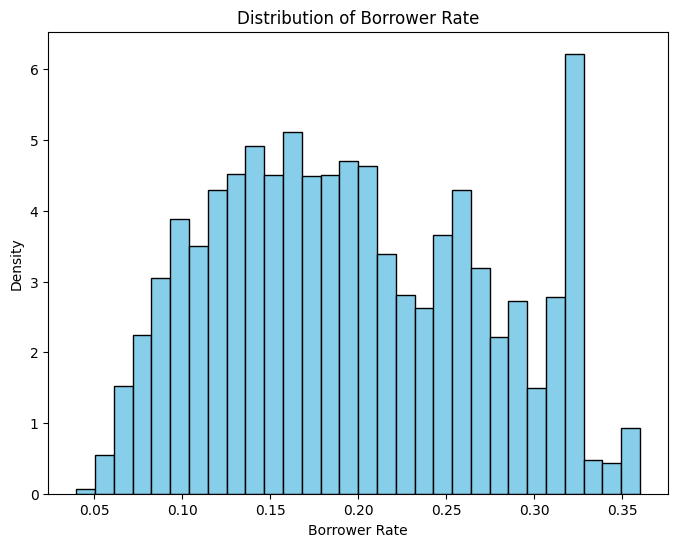

In [6]:
# Create a histogram for 'BorrowerRate'
plt.figure(figsize=(8, 6))
plt.hist(target_df['BorrowerRate'], bins=30, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Borrower Rate')
plt.ylabel('Density')
plt.title('Distribution of Borrower Rate')
plt.show()

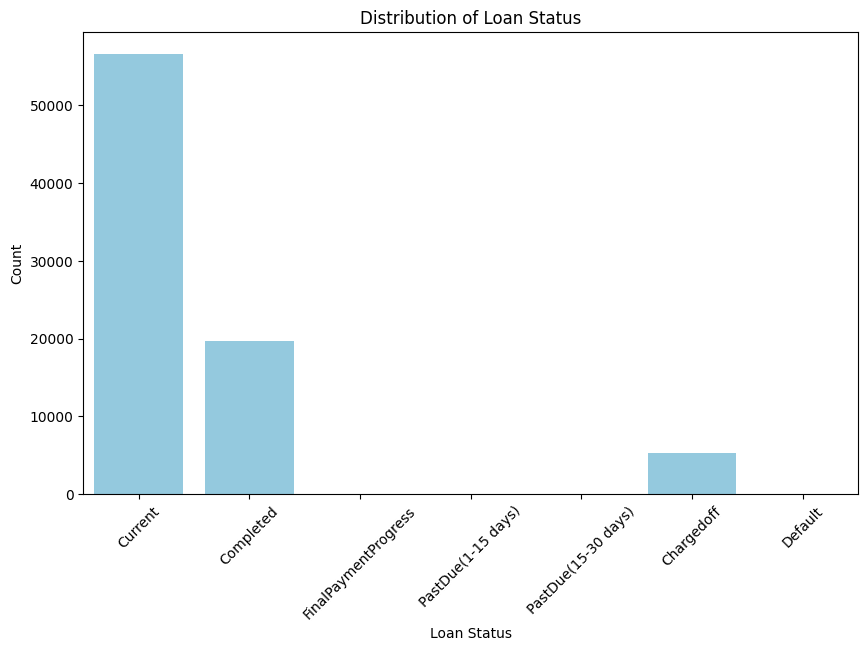

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of LoanStatus
loan_status_order = [
    'Current', 'Completed', 'FinalPaymentProgress',
    'PastDue(1-15 days)', 'PastDue(15-30 days)', 
    # Add other statuses as needed
    'Chargedoff', 'Default'
]

plt.figure(figsize=(10, 6))
loan_status_plot = sns.countplot(data=target_df, x='LoanStatus', color='skyblue', order=loan_status_order)
# labels and title
loan_status_plot.set(xlabel='Loan Status', ylabel='Count', title='Distribution of Loan Status')
plt.xticks(rotation=45)
# Display
plt.show()


# employee Overview


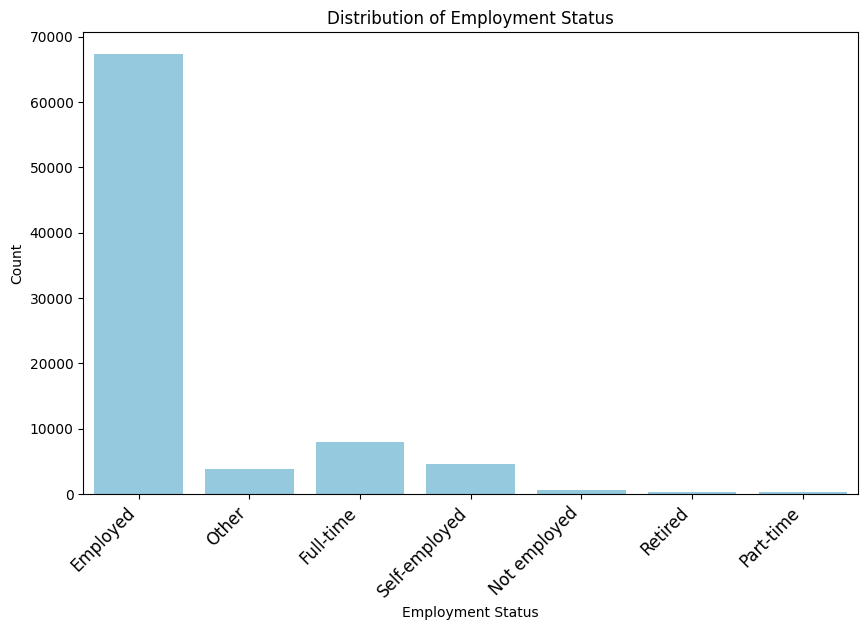

In [20]:
plt.figure(figsize=(10, 6))
employment_status_plot = sns.countplot(data=target_df, x='EmploymentStatus', color='skyblue')
# labels and title
employment_status_plot.set(xlabel='Employment Status', ylabel='Count', title='Distribution of Employment Status')
plt.xticks(rotation=45, ha='right', fontsize=12)
# plot
plt.show()

# Income Overview


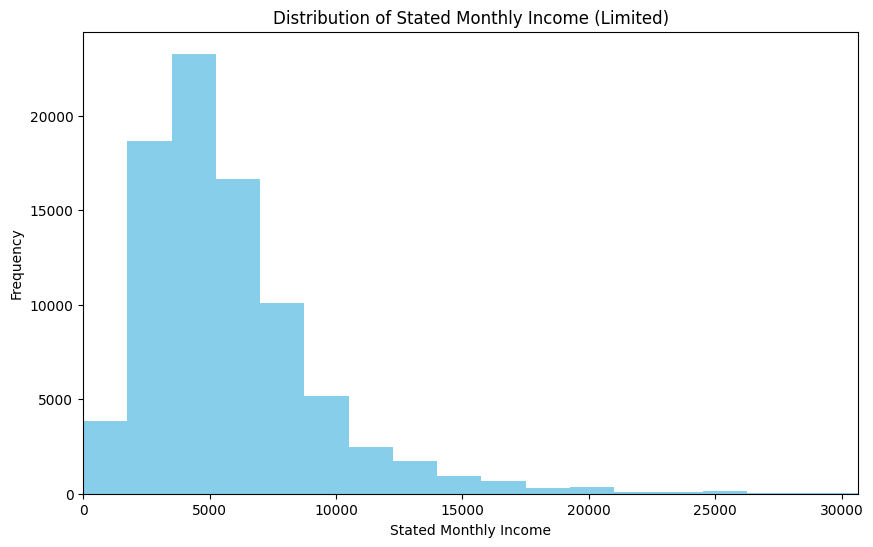

In [21]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
# boundary 
boundary = income_mean + income_std * 3
plt.figure(figsize=(10, 6))
plt.hist(target_df['StatedMonthlyIncome'], bins=1000, color='skyblue')
plt.xlim((0, boundary))
# labels and title
plt.xlabel('Stated Monthly Income')
plt.ylabel('Frequency')
plt.title('Distribution of Stated Monthly Income (Limited)')
# plot
plt.show()

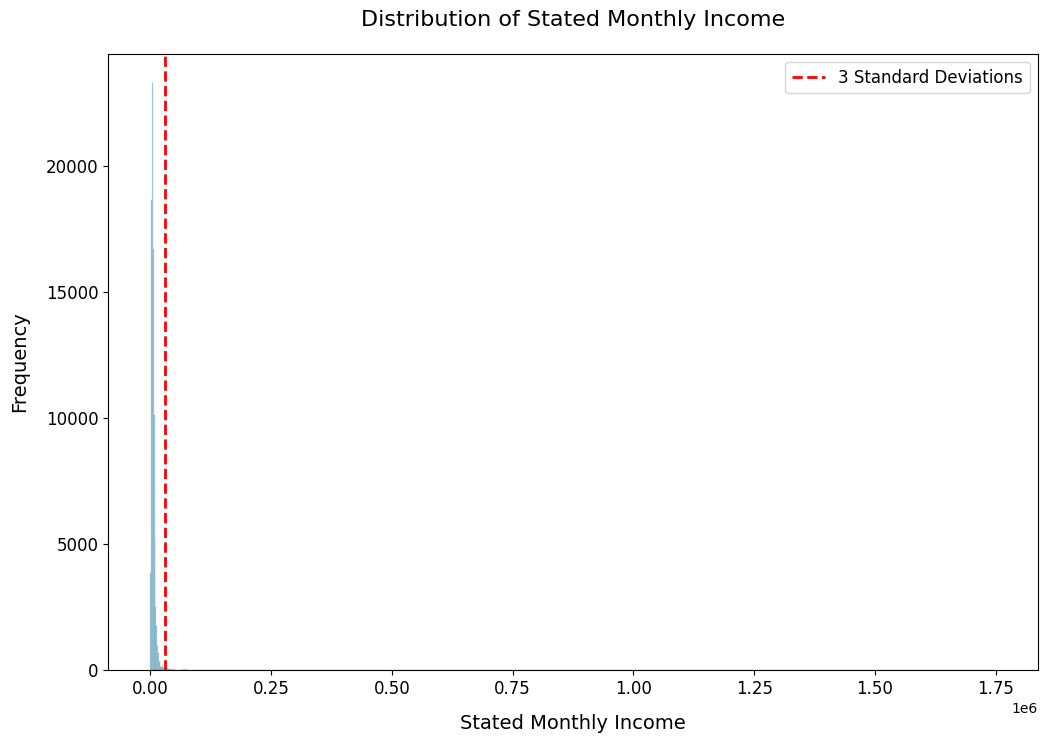

In [22]:
# boundary for income
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
# histogram 'StatedMonthlyIncome'
plt.figure(figsize=(12, 8))
sns.histplot(data=target_df, x='StatedMonthlyIncome', bins=1000, color='skyblue', edgecolor='black')
plt.xlabel('Stated Monthly Income', fontsize=14, labelpad=12)
plt.ylabel('Frequency', fontsize=14, labelpad=12)
plt.title('Distribution of Stated Monthly Income', fontsize=16, pad=20)
plt.axvline(boundary, color='red', linestyle='dashed', linewidth=2, label='3 Standard Deviations')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [21]:
valid_statuses = ['Completed', 'Defaulted', 'Chargedoff']
target_df = target_df[target_df['LoanStatus'].isin(valid_statuses)]
def change_to_defaulted(status):
    return 'Defaulted' if status == 'Chargedoff' else status
target_df['LoanStatus'] = target_df['LoanStatus'].apply(change_to_defaulted)
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_category(loan_category):
    return categories.get(loan_category, categories[7])
# Apply function 
target_df['ListingCategory (numeric)'] = target_df['ListingCategory (numeric)'].apply(reduce_category)

#### Key Insights:

1. Employment Diversity: Borrowers mainly fall into the "Employed" category, overshadowing other employment statuses.

2. Loan Status Overview:
   - Prevalence of current loans.
   - Past due loans are categorized by payment delays.

3. Employment Composition:
   - Employment distribution is skewed towards full-time, with other categories contributing less.

4. Monthly Income Trends:
   - Right-skewed income distribution with a notable mode around $5000.
   - Some loans show significant payment delays.

##### Summary of Insights


# Overview of Loan Status and the Rating


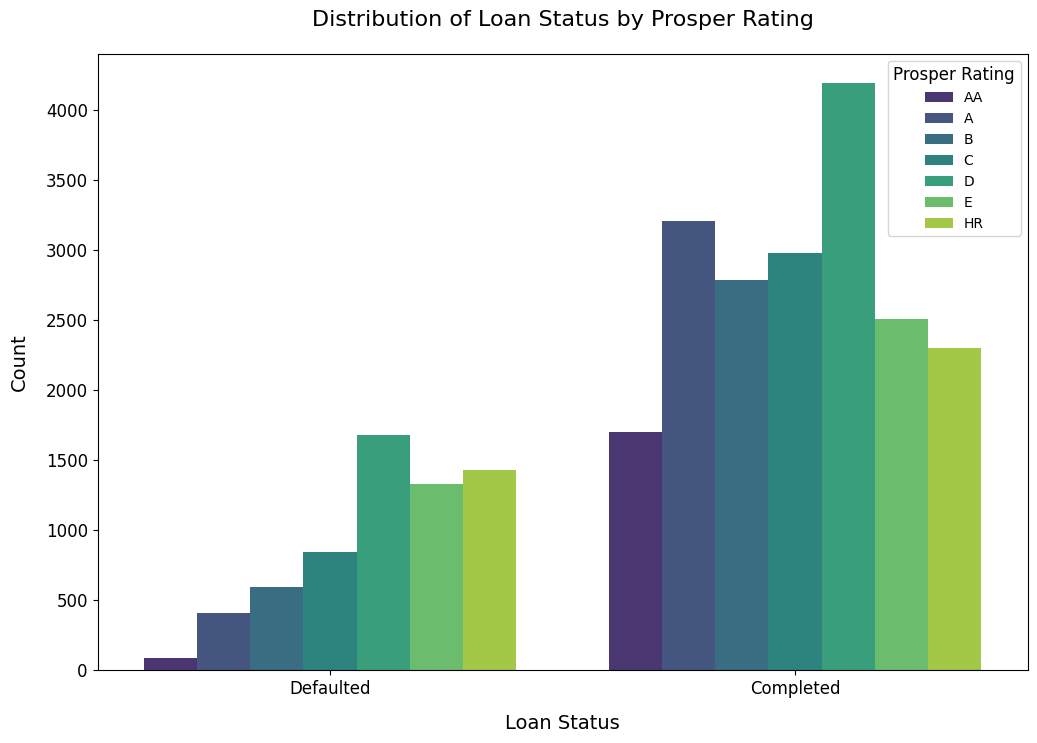

In [22]:
plt.figure(figsize=(12, 8))
# color palette
sns.countplot(data=target_df, x='LoanStatus', hue='ProsperRating (Alpha)', palette='viridis')
# Set labels clarity
plt.xlabel('Loan Status', fontsize=14, labelpad=12)
plt.ylabel('Count', fontsize=14, labelpad=12)
plt.title('Distribution of Loan Status by Prosper Rating', fontsize=16, pad=20)
# title
plt.legend(title='Prosper Rating', title_fontsize='12')
# better readability
plt.xticks(rotation=0, fontsize=12)
# label size
plt.yticks(fontsize=12)
# plot
plt.show()


# Distribution of Credit Start by Listing Category


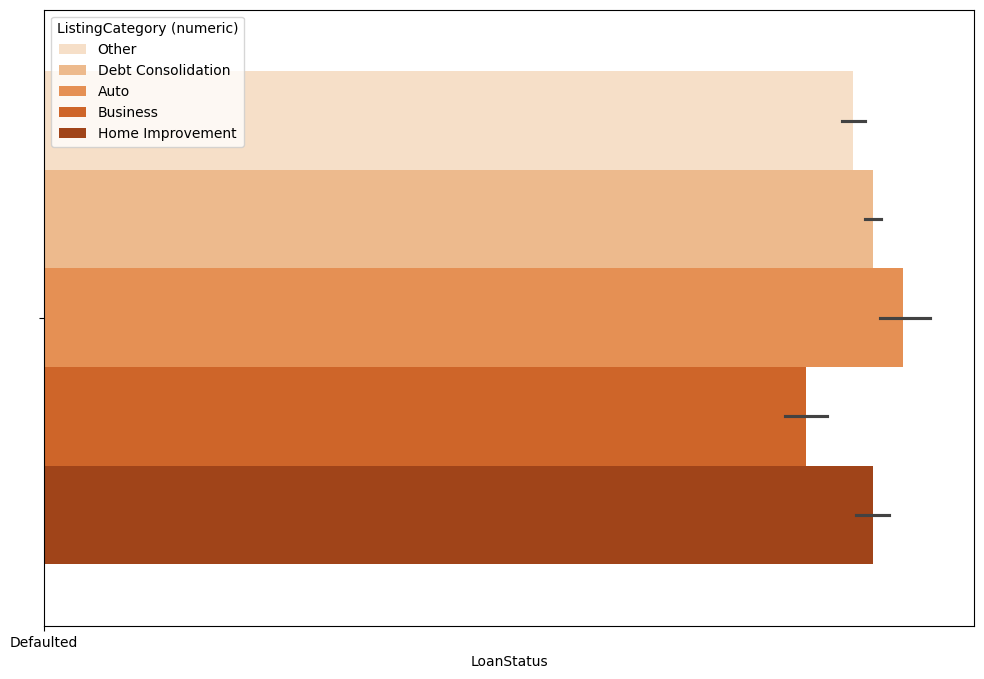

In [25]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot showing the distribution of 'LoanStatus' with 'ListingCategory (numeric)' as hue using the 'Oranges' palette
sns.barplot(data=target_df, x='LoanStatus', hue='ListingCategory (numeric)', palette='Oranges')

# Display the plot
plt.show()


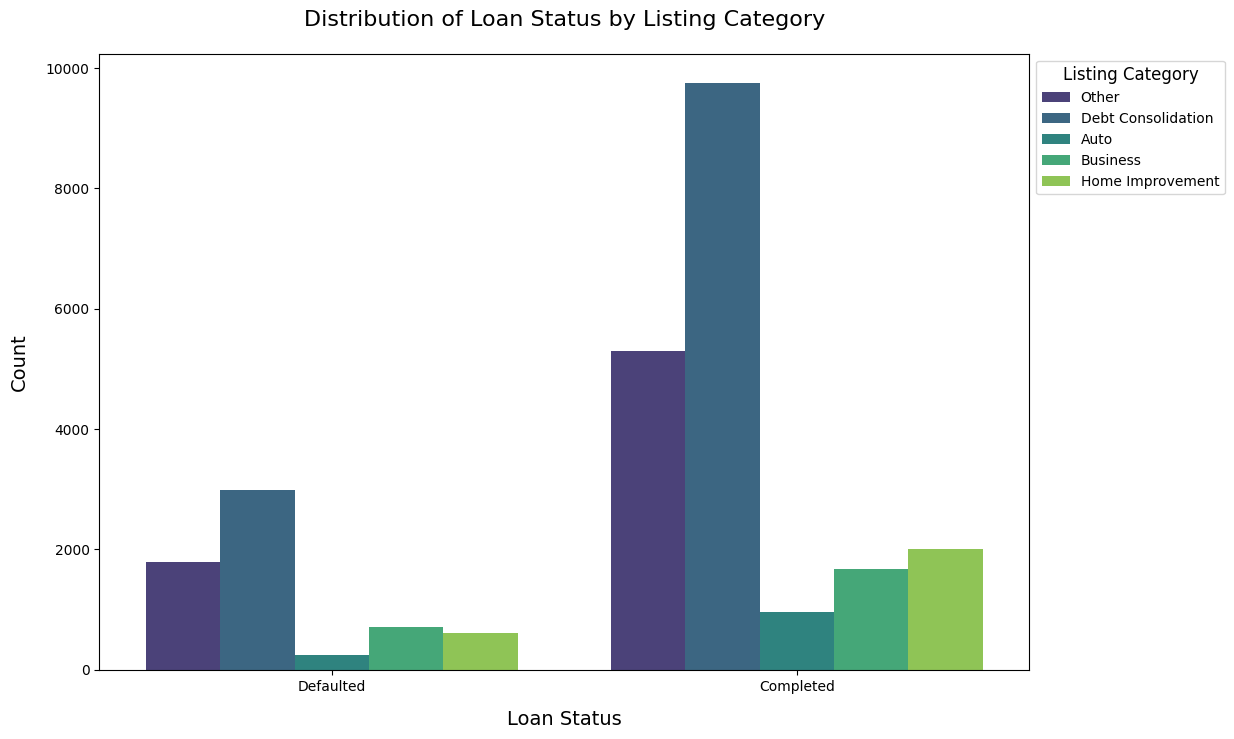

In [26]:
plt.figure(figsize=(12, 8))
# professional color palette
sns.countplot(data=target_df, x='LoanStatus', hue='ListingCategory (numeric)', palette='viridis')
# better clarity
plt.xlabel('Loan Status', fontsize=14, labelpad=12)
plt.ylabel('Count', fontsize=14, labelpad=12)
plt.title('Distribution of Loan Status by Listing Category', fontsize=16, pad=20)
plt.legend(title='Listing Category', title_fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Relationship between Loan Status and Loan Amount


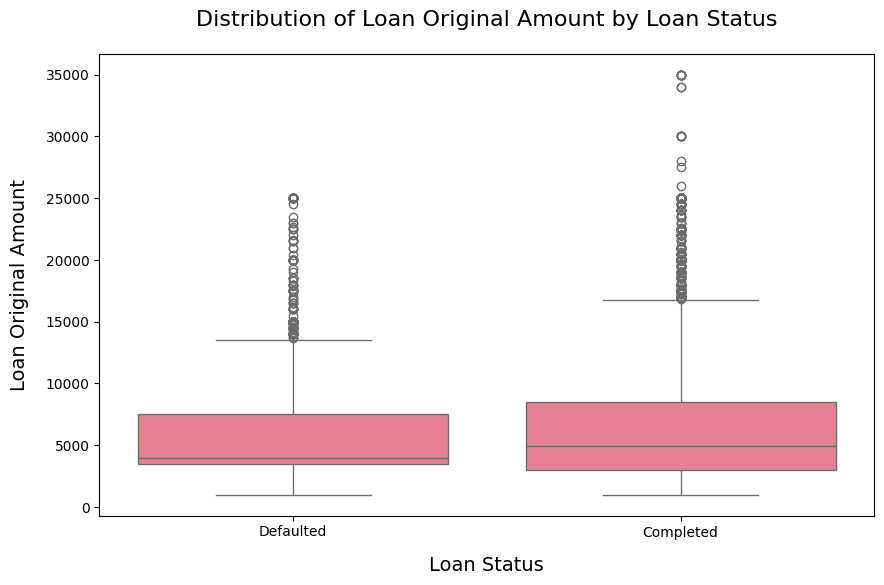

In [27]:
plt.figure(figsize=(10, 6))
plot_color = sns.color_palette('husl')[0]
sns.boxplot(x='LoanStatus', y='LoanOriginalAmount', data=target_df, color=plot_color)
plt.xlabel('Loan Status', fontsize=14, labelpad=12)
plt.ylabel('Loan Original Amount', fontsize=14, labelpad=12)
plt.title('Distribution of Loan Original Amount by Loan Status', fontsize=16, pad=20)
plt.show()

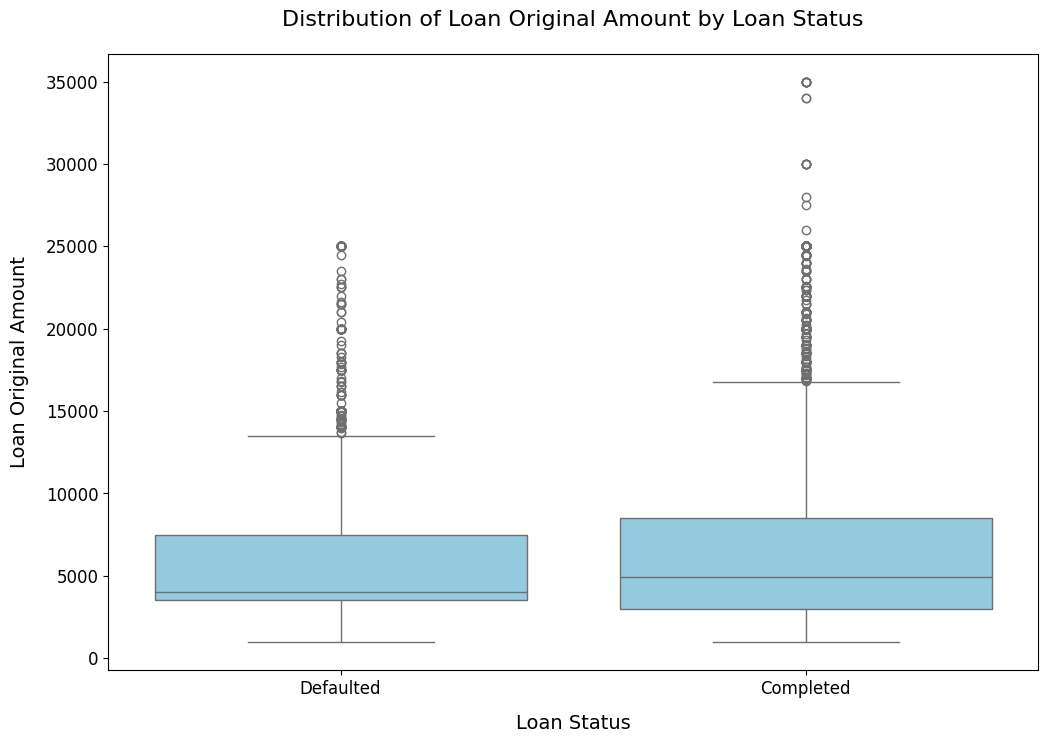

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# figure size
plt.figure(figsize=[12, 8])
# boxplot
ax = sns.boxplot(data=target_df, x='LoanStatus', y='LoanOriginalAmount', color='skyblue')
# labels and title
ax.set_xlabel('Loan Status', fontsize=14, labelpad=12)
ax.set_ylabel('Loan Original Amount', fontsize=14, labelpad=12)
ax.set_title('Distribution of Loan Original Amount by Loan Status', fontsize=16, pad=20)
ax.tick_params(axis='both', labelsize=12)
plt.show()

# Relationship between Prosper Rating and Employment Status


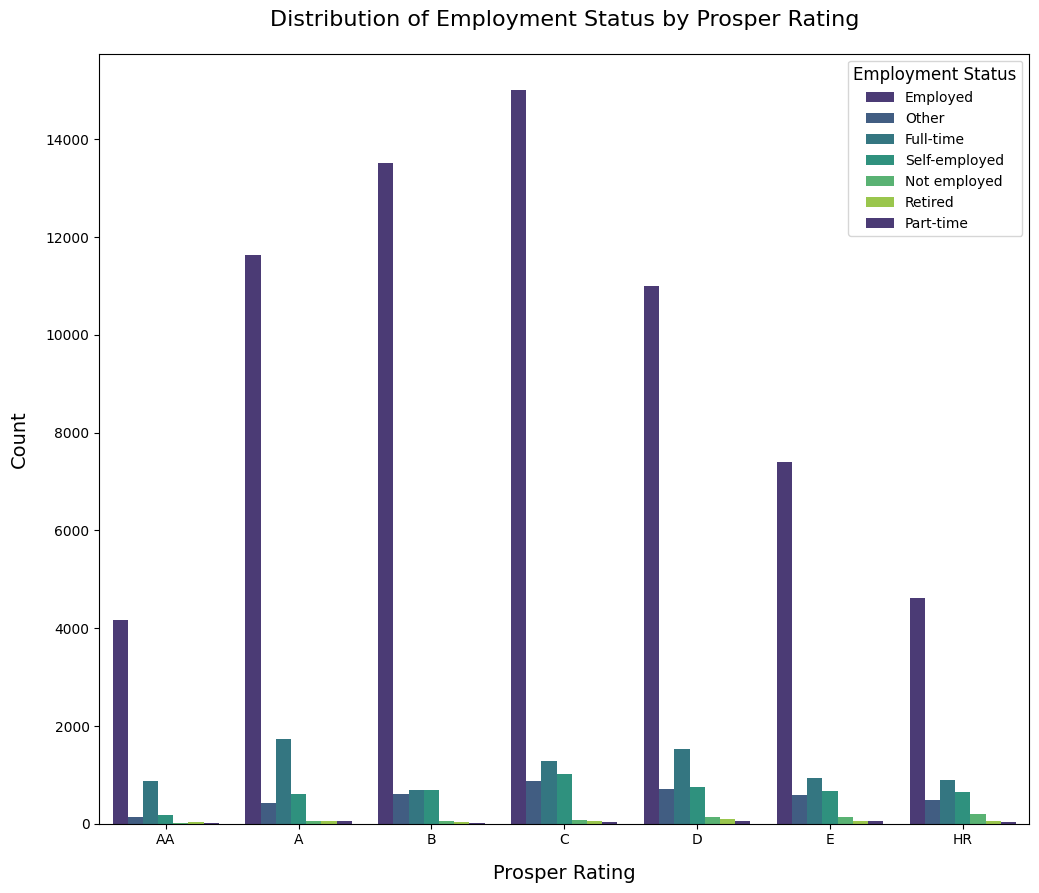

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of ProsperRating (Alpha)
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

plt.figure(figsize=[12, 10])
color_palette = sns.color_palette('viridis')
sns.countplot(data=target_df, x='ProsperRating (Alpha)', hue='EmploymentStatus', palette=color_palette, order=prosper_rating_order)
# better clarity
plt.xlabel('Prosper Rating', fontsize=14, labelpad=12)
plt.ylabel('Count', fontsize=14, labelpad=12)
plt.title('Distribution of Employment Status by Prosper Rating', fontsize=16, pad=20)
# legend
plt.legend(title='Employment Status', title_fontsize='12', loc='upper right')
# plot
plt.show()


## Key Findings:
1. Top Prosper rating for defaulted loans is 'D', while for completed loans, it is 'A'.
2. Debt Consolidation is the most frequent listing category in both loan statuses.
3. Defaulted credits tend to be smaller than completed credits.
4. Lower ratings correlate with higher proportions of individuals in employment statuses like Not Employed, Self-employed, Retired, and Part-Time.


## Insight into Credit Rating, Loan Amount, and Loan Status

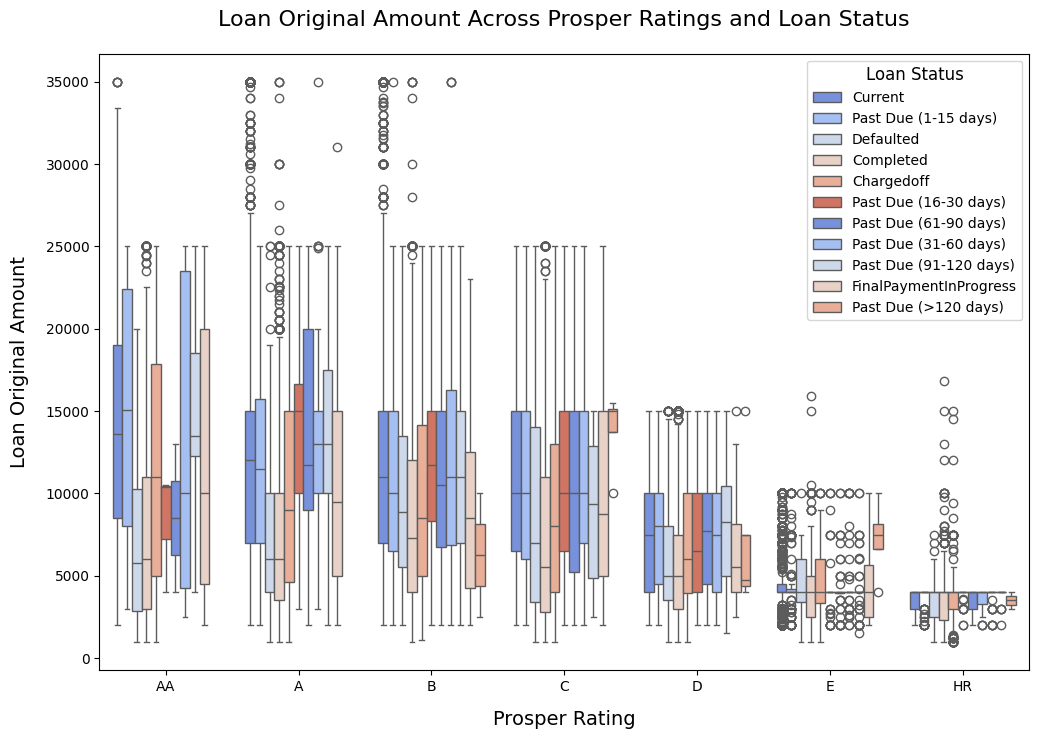

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of ProsperRating (Alpha)
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

plt.figure(figsize=[12, 8])
color_palette = sns.color_palette('coolwarm')
sns.boxplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', palette=color_palette, order=prosper_rating_order)
plt.xlabel('Prosper Rating', fontsize=14, labelpad=12)
plt.ylabel('Loan Original Amount', fontsize=14, labelpad=12)
plt.title('Loan Original Amount Across Prosper Ratings and Loan Status', fontsize=16, pad=20)
plt.legend(title='Loan Status', title_fontsize='12', loc='upper right')
plt.show()


## Interplay of Credit Category, Credit Rating, and Credit Outcome

<Figure size 1500x1000 with 0 Axes>

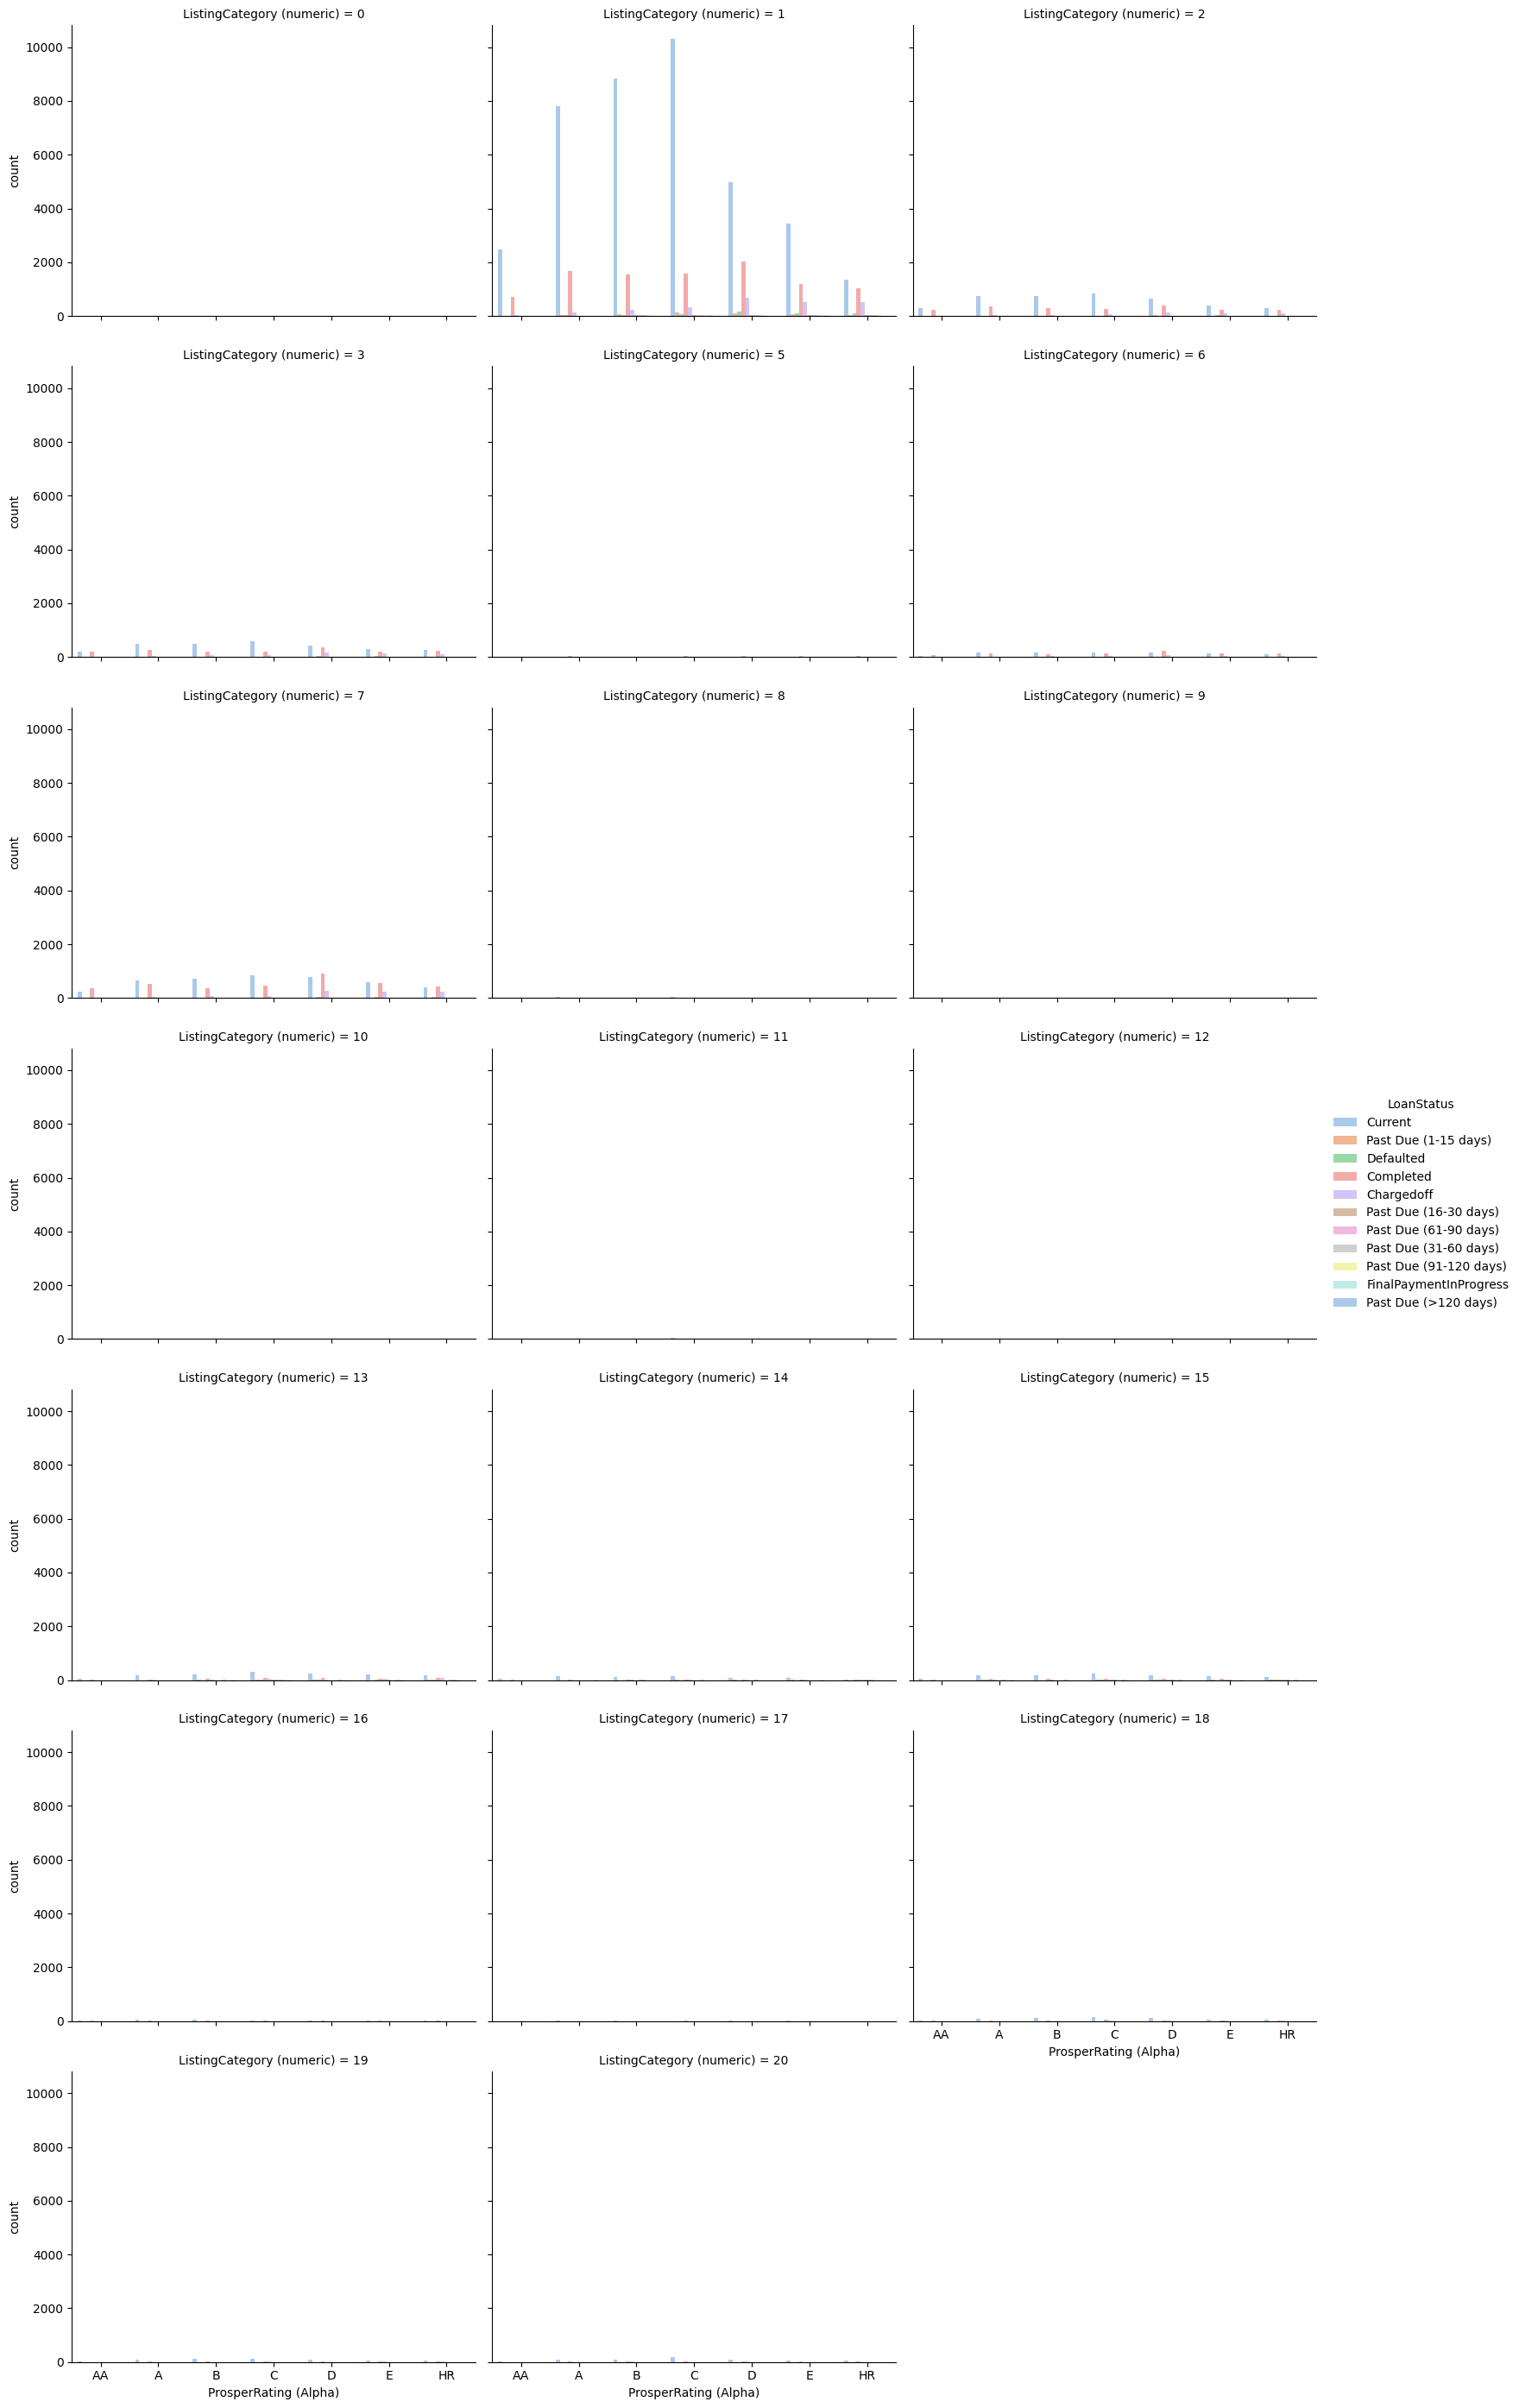

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of ProsperRating (Alpha)
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

plt.figure(figsize=(15, 10))
color_palette = sns.color_palette('pastel')
sns.catplot(x='ProsperRating (Alpha)', hue='LoanStatus', col='ListingCategory (numeric)',
            data=target_df, kind='count', palette=color_palette, col_wrap=3, height=4, aspect=1.3, order=prosper_rating_order)
plt.show()


## Interaction of Loan Amount, Listing Category, and Loan Status

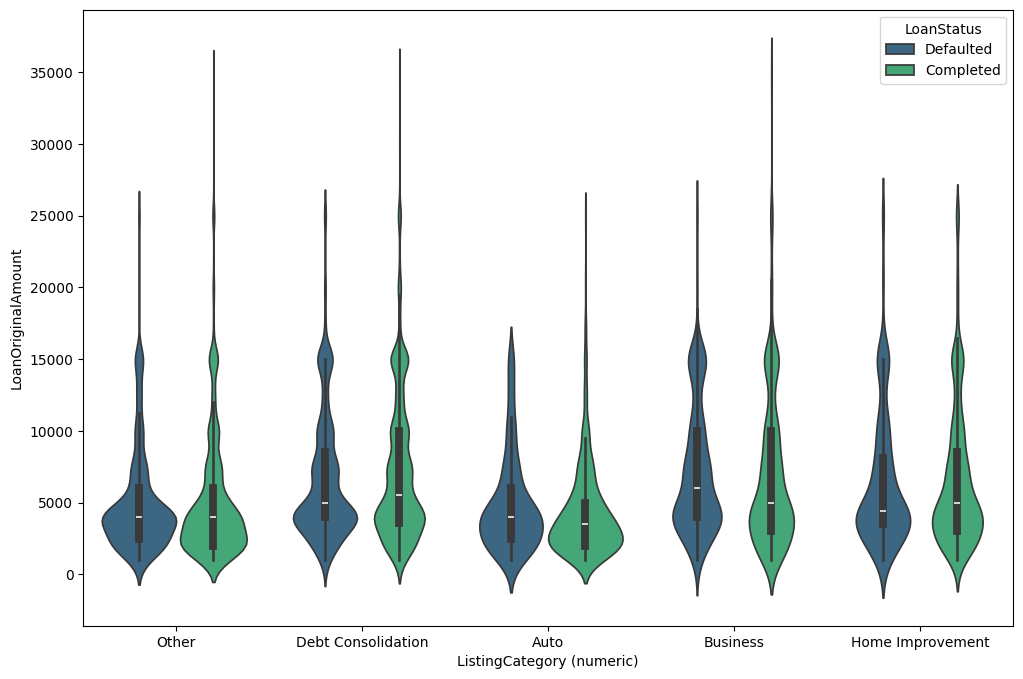

In [33]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=target_df['ListingCategory (numeric)'], y=target_df['LoanOriginalAmount'], hue=target_df['LoanStatus'], palette='viridis')
plt.show()


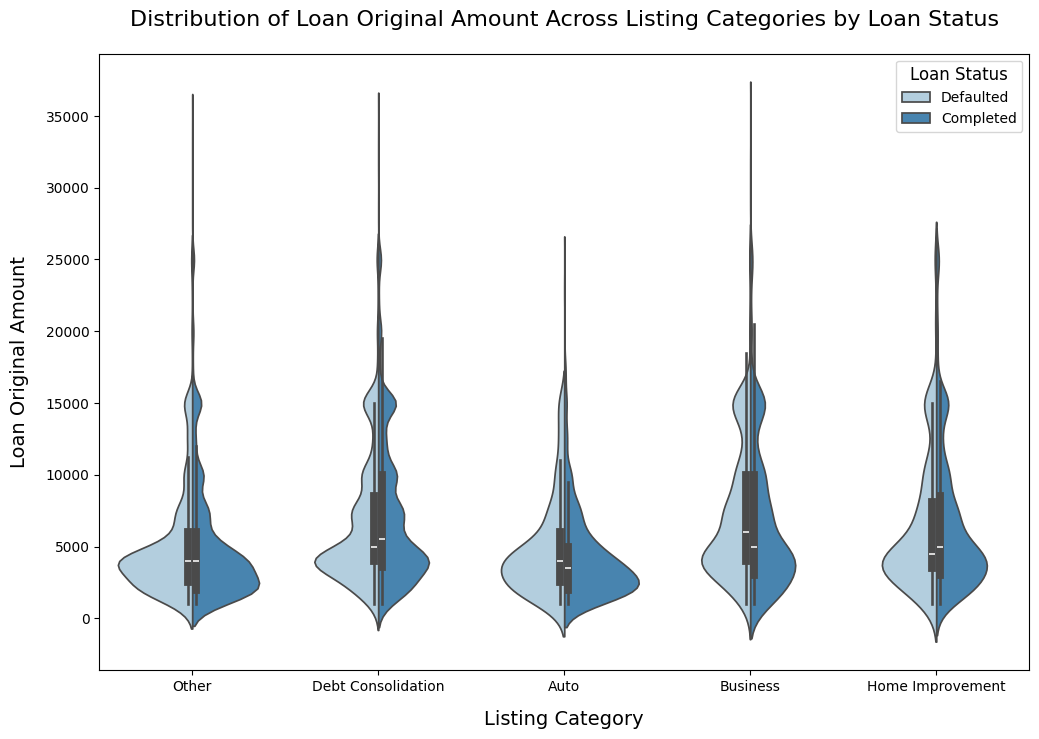

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[12, 8])
# violin plot
ax = sns.violinplot(data=target_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus', split=True, palette='Blues')
ax.set_xlabel('Listing Category', fontsize=14, labelpad=12)
ax.set_ylabel('Loan Original Amount', fontsize=14, labelpad=12)
ax.set_title('Distribution of Loan Original Amount Across Listing Categories by Loan Status', fontsize=16, pad=20)
# The legend
ax.legend(title='Loan Status', title_fontsize='12', loc='upper right')
# Show plot
plt.show()

## Relationship between Loan Amount and Borrower Rate

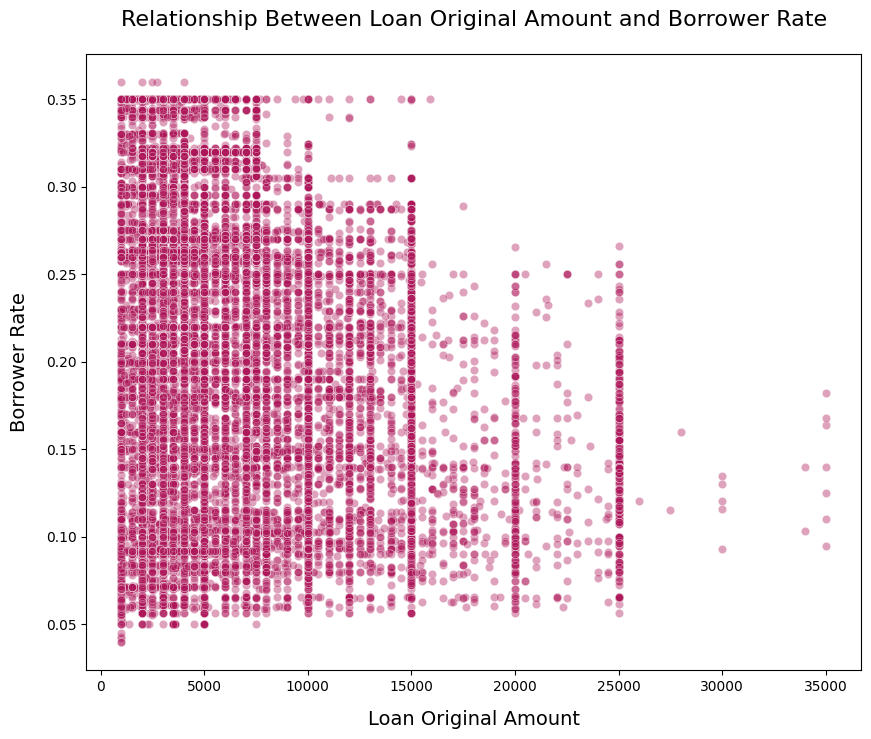

In [35]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
color_palette = sns.color_palette('rocket')
sns.scatterplot(x=target_df['LoanOriginalAmount'], y=target_df['BorrowerRate'], alpha=0.4, color=color_palette[2])
# Improve labels and title
plt.xlabel('Loan Original Amount', fontsize=14, labelpad=12)
plt.ylabel('Borrower Rate', fontsize=14, labelpad=12)
plt.title('Relationship Between Loan Original Amount and Borrower Rate', fontsize=16, pad=20)
# Shown the plot
plt.show()

## Visualizing Loan Status and Prosper Rating Distribution

<Figure size 1400x800 with 0 Axes>

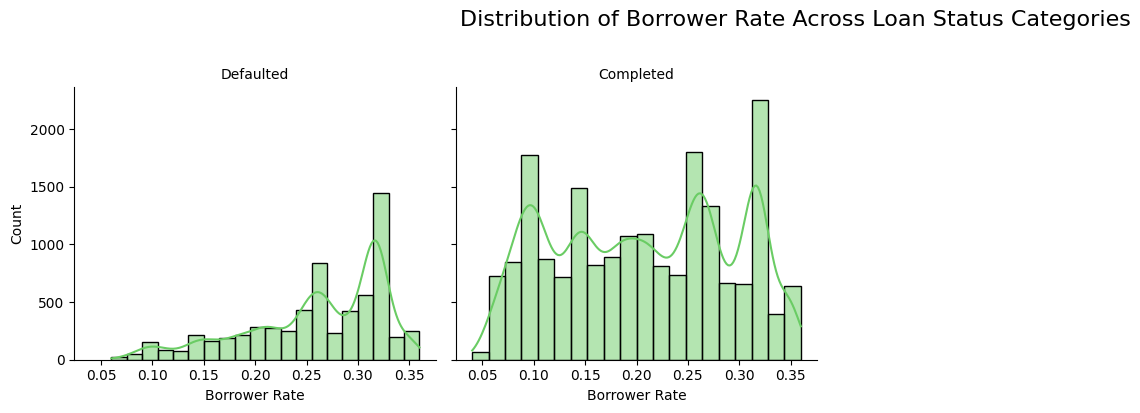

In [36]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
# figure size
plt.figure(figsize=(14, 8))
# Choose color 
color_palette = sns.color_palette('muted')
g = sns.FacetGrid(data=target_df, col="LoanStatus", col_wrap=4, height=4, aspect=1)
g.map(sns.histplot, "BorrowerRate", bins=20, kde=True, color=color_palette[2])
# titles and labels
g.set_titles("{col_name}")
g.set_xlabels("Borrower Rate")
g.set_ylabels("Count")
plt.suptitle("Distribution of Borrower Rate Across Loan Status Categories", fontsize=16, y=1.02)
plt.tight_layout()
# Show the plot
plt.show()

<Figure size 1400x700 with 0 Axes>

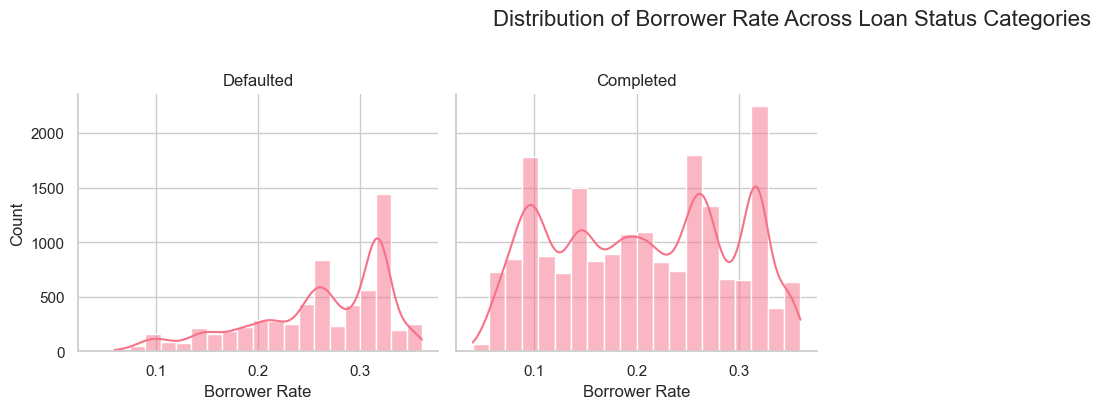

In [37]:
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid", palette="husl")
g = sns.FacetGrid(target_df, col="LoanStatus", col_wrap=4, height=4, aspect=1)
g.map(sns.histplot, "BorrowerRate", bins=20, kde=True)
g.set_titles("{col_name}")
g.set_xlabels("Borrower Rate")
g.set_ylabels("Count")
plt.suptitle("Distribution of Borrower Rate Across Loan Status Categories", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Key Insights:

1. Larger defaulted credits are noticeable, particularly for lower Prosper ratings, indicating potential risk factors.
2. Distinct differences in loan amounts exist among categories, with Business loans consistently displaying higher values.
3. Specific loan categories, notably Business, consistently exhibit higher mean amounts, suggesting varied borrowing purposes.
4. Borrower rates between 0.1 and 0.2 are predominant, with a slight increase for charged-off and defaulted loans.
5. Borrower Rate Distribution: Right-skewed distribution with rates concentrated between 0.1 and 0.2.
6. Loan Status Overview: Prevalence of current loans; past-due loans categorized by varying payment delays.
7. Monthly Income Trends: Right-skewed income distribution with a mode around $5000.
8. Prosper Rating and Employment Status: Distribution of employment status across Prosper ratings.

